In [1]:
import glob
import os

import numpy as np
import pandas as pd
import scipy.signal

import altair as alt
import altair_catplot as altcat

# Image processing tools
import skimage
import skimage.io

import bebi103

import bokeh
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
cd ~/git

/Users/Sanyo 1/git


In [3]:
int_day = np.genfromtxt('day_intotal_all.csv', delimiter=',')
t_day = int_day[-1]
int_day = int_day[0:-1]

int_night = np.genfromtxt('night_intotal_all.csv', delimiter=',')
t_night = int_night[-1]
int_night = int_night[0:-1]

In [9]:
def period_find_day_and_night(t_day, i_day, t_night, i_night, ID, pheight=0, pwidth=2):
    pulse_peaks,_ = scipy.signal.find_peaks(i_day[ID],height = pheight, width = pwidth)
    dt = np.diff(pulse_peaks)
    df_dt1 = pd.DataFrame(dt)
    df_dt1['Day'] = True;    
    pulse_peaks,_= scipy.signal.find_peaks(i_night[ID],height = pheight, width = pwidth)
    dt = np.diff(pulse_peaks)
    df_dt2 = pd.DataFrame(dt)
    df_dt2['Day'] = False;
    df_dt = pd.concat([df_dt1, df_dt2])
    df_dt = df_dt.rename(columns={0: 'P'})
    df_dt['ID'] = ID
    #df_dt = df_dt.reset_index(drop=True)
    return df_dt

df_dt = period_find_day_and_night(t_day, int_day, t_night, int_night, ID=0)

for i in range(7):
    df_dt = pd.concat([df_dt, period_find_day_and_night(t_day, int_day, t_night, int_night, ID=(i+1))])

df_dt = df_dt.reset_index(drop=True)
df_dt

,P,Day,ID
0,13,True,0
1,12,True,0
2,12,True,0
3,12,True,0
4,13,True,0
5,11,True,0
6,11,True,0
7,13,True,0
8,12,True,0
9,12,True,0


In [ ]:
p = bokeh.plotting.figure(plot_width=650,
                          plot_height=300,
                          x_axis_label='time (s)', 
                          y_axis_label='total intensity')

p.line(t_day, int_day[i], line_width=2, line_join='bevel',color='blue',alpha = 0.7)
#p.line(t_night[0], t_night[1], line_width=2, line_join='bevel',color='orange',alpha = 0.7)
p.circle(t_day[pulse_peaks[0]],int_day[i][pulse_peaks[0]],color='green')
#p.circle(t_night[0][p1],t_night[1][p2],color='red')


bokeh.io.show(p)

In [ ]:
p = bokeh.plotting.figure(plot_width=650,
                          plot_height=300,
                          x_axis_label='time (s)', 
                          y_axis_label='total intensity')

#p.line(t_day[0], t_day[1], line_width=2, line_join='bevel',color='blue',alpha = 0.7)
p.line(t_night, int_night[i], line_width=2, line_join='bevel',color='orange',alpha = 0.7)
#p.circle(t_day[0][p1],t_day[1][p1],color='red')
p.circle(t_night[pulse_peaks[1]],int_night[i][pulse_peaks[1]],color='red')

bokeh.io.show(p)

In [ ]:
p = bokeh.plotting.figure(plot_width=650,
                          plot_height=300,
                          x_axis_label='time (s)', 
                          y_axis_label='total intensity')

p.line(t_day[pulse_peaks[0][0:-1]], dt[0], line_width=2, line_join='bevel',color='blue',alpha = 0.7)
p.line(t_night[pulse_peaks[1][0:-1]], dt[1], line_width=2, line_join='bevel',color='orange',alpha = 0.7)


bokeh.io.show(p)

In [ ]:
dt = [[],[]]
for i in range(2):
    dt[i] = np.diff(pulse_peaks[i])
df_dt1 = pd.DataFrame(dt[0])
#df_dt = df_dt.transpose()
#df_dt = df_dt.rename(columns={0: 'Day'})
#df_dt = df_dt.rename(columns={1: 'Night'})
df_dt1['Day'] = 1
df_dt2 = pd.DataFrame(dt[1])
df_dt2['Day'] = 0
df_dt = pd.concat([df_dt1, df_dt2])
df_dt = df_dt.rename(columns={0: 'P'})
df_dt = df_dt.reset_index(drop=True)
df_dt

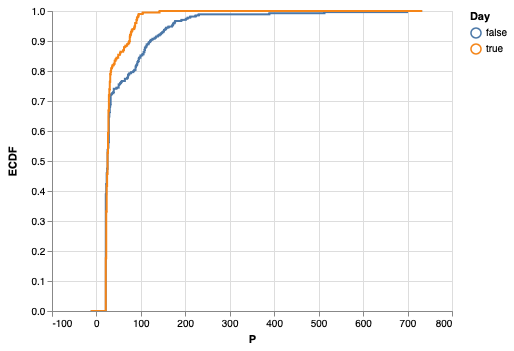

In [18]:
p1 = altcat.catplot(data=df_dt.loc[df_dt['P'] > 20],
                    mark='line',
                    encoding=dict(x=alt.X('P:Q'),
                                  color=alt.Color('Day:N')),
                    transform = 'ecdf')

p1

In [19]:
p = bebi103.viz.jitter(data=df_dt, 
                       cats='Day',
                       val='P',
                       y_axis_label=None,
                       horizontal=False)
bokeh.io.show(p)

In [105]:
list(np.array([1, 2, 3])) + list(np.array([4, 5]))

[1, 2, 3, 4, 5]